<h1>Microsoft Stock Analysis</h1>
The objective of this article is to provide some insights on the performance of Microsoft's stock.


## Library imports
We start by importing some libraries that will be used.

In [88]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

In order to easily plot pandas dataframes we use cufflinks:
https://github.com/santosjorge/cufflinks

In order to display better quality graphs we use plotly:
https://plotly.com/python/

Run the cell below if you want to have the interactive plots. Keep in mind that you have to install the libraries at your command line/terminal using:

pip install plotly <br>
pip install cufflinks

NOTE: Make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work.

In [89]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

4.6.0


We get our Microsoft stock data from Yahoo finance using pandas datareader:

In [90]:
stocks = ['MSFT']

# Specify start and end times
# Satya Nadella was announced as CEO on the 4th of February 2014
start = datetime(2014,2,4)
end = datetime.now()


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in stocks:   
    # Set DataFrame as the Stock Ticker
    # This creates a dataframe named after the corresponding stock
    globals()[stock] = DataReader(stock,'yahoo',start,end)

Example of a collected dataframe:

In [91]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-02-04,37.189999,36.250000,36.970001,36.349998,54697900.0,31.677233
2014-02-05,36.470001,35.799999,36.290001,35.820000,55814400.0,31.215355
2014-02-06,36.250000,35.689999,35.799999,36.180000,35351800.0,31.529068
2014-02-07,36.590000,36.009998,36.320000,36.560001,33260500.0,31.860235
2014-02-10,36.799999,36.290001,36.630001,36.799999,26767000.0,32.069389


In [92]:
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1572.000000,1572.000000,1572.000000,1572.000000,1.572000e+03,1572.000000
mean,80.725057,79.234777,80.002793,80.025331,3.061205e+07,76.918064
std,38.195441,37.269672,37.768707,37.758307,1.541449e+07,39.096868
min,36.250000,35.689999,35.799999,35.820000,7.425600e+06,31.215355
25%,47.990002,47.267500,47.625001,47.617499,2.144055e+07,43.053249
50%,65.239998,64.665001,64.985001,64.945000,2.693000e+07,61.730576
75%,107.900002,105.397499,106.777500,106.809998,3.473822e+07,104.588884
max,190.699997,186.470001,190.649994,188.699997,2.025224e+08,188.185989


In [93]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1572 entries, 2014-02-04 to 2020-05-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1572 non-null   float64
 1   Low        1572 non-null   float64
 2   Open       1572 non-null   float64
 3   Close      1572 non-null   float64
 4   Volume     1572 non-null   float64
 5   Adj Close  1572 non-null   float64
dtypes: float64(6)
memory usage: 86.0 KB


## Current and past stock information

In [94]:
# Using the close price
ms_close = MSFT.loc[:,'Close'].iplot(title='Microsoft - Closing Price')

We can also use Adjusted closing prices of stocks. Adjusted Closing Prices accurately reflect the stocks' value after accounting for any corporate actions such as stock splits, dividends / distributions and rights offerings.

In [95]:
ms_adj_close = MSFT.loc[:,'Adj Close'].iplot(title='Microsoft - Adjusted Closing Price')

Addittionally, we can look into the volume of stocks traded:

In [96]:
MSFT.loc[:,'Volume'].iplot(title='Microsoft - Volume')

Volume mean:

In [97]:
MSFT.loc[:,'Volume'].mean()

30612053.435114503

On average, 30.6 million Microsoft stocks are trade per day.

In order to have a better understanding of the change in stock prices we can calculate the mean value over a number of days in order to compensate for any spikes.
We perform the average over, 10, 20 and 30 days and compare it with the raw closing price:

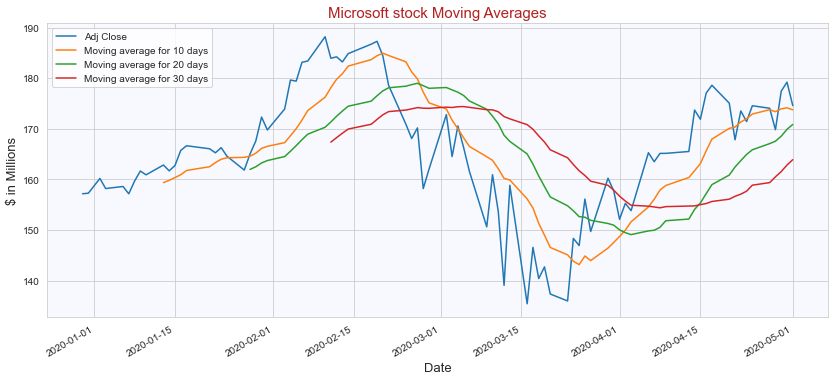

In [100]:
# Get MSFT stock data with different timeframe
MSFT_recent = DataReader('MSFT','yahoo',datetime(2019,12,30),end)

# Calculating and plotting moving averages
ma_day = [10,20,30]
for ma in ma_day:
    column_name = f'Moving average for {ma} days'  
    MSFT_recent[column_name] = MSFT_recent['Adj Close'].rolling(ma).mean()

ax = MSFT_recent.loc[:,['Adj Close', 'Moving average for 10 days', 'Moving average for 20 days', 'Moving average for 30 days' ]].plot(subplots=False,figsize=(14,6))
ax.set_ylabel('$ in Millions', fontsize=13)
ax.set_xlabel('Date', fontsize=13)
ax.set_title("Microsoft stock Moving Averages",size=15,color='firebrick')
ax.set_facecolor('ghostwhite')

We can also compare the Microsoft stock value change plot with the S&P500 to understand if it correlated. To help in visualizing, we divide all the values in the S&P500 by a constant:

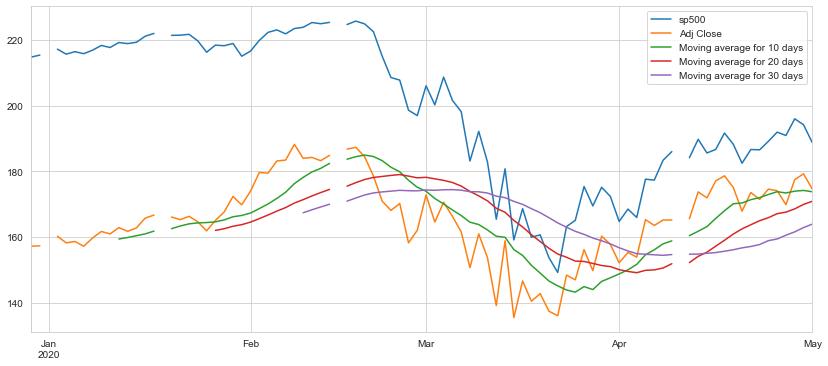

In [101]:
# Getting S&P500 data and comparing it to Microsoft stock value
SP500 = DataReader(['sp500'], 'fred', datetime(2019,12,30), end)

# Divide values in S&P500 to be able to visually compare with MSFT
SP500 = SP500 / 15

SP500_comparison = pd.concat([SP500, MSFT_recent.loc[:,['Adj Close', 'Moving average for 10 days', 'Moving average for 20 days', 'Moving average for 30 days' ]]], axis=1, sort=False)

bx = SP500_comparison.plot(subplots=False,figsize=(14,6))

We can see there is a strong correlation

## Daily change in price in %

In [102]:
# Get dataframe with closing price
df_adj_close = DataReader('MSFT','yahoo',datetime(2019,12,30),end)["Adj Close"]

# Get the daily change in stock price
#pct_change() calculates the difference between an element and its previous element
daily_change = df_adj_close.pct_change()


# Remove missing values with dropna()
daily_change = daily_change.dropna()
daily_change

Date
2019-12-31    0.000698
2020-01-02    0.018516
2020-01-03   -0.012452
2020-01-06    0.002585
2020-01-07   -0.009118
                ...   
2020-04-27   -0.002865
2020-04-28   -0.024361
2020-04-29    0.044874
2020-04-30    0.010032
2020-05-01   -0.025891
Name: Adj Close, Length: 85, dtype: float64

## Monte Carlo Simulation

The Monte Carlo simulation is based on performing a random walk over many iterations. This way we are capable of predicting possible scenarios and have an estimation of the risk we are taking.

In [103]:
#Value at Risk using Monte Carlo Method

# Setting time frame. 253 trading days in a year
days = 253

# Delta
dt=1/253

# Setting the drift
mu = daily_change.mean()

# Setting the volatility sigma
sigma = daily_change.std()

# Creating a function for Monte Carlo simulation
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [104]:
start_price = MSFT.iloc[-1,5]
start_price

174.57000732421875

Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

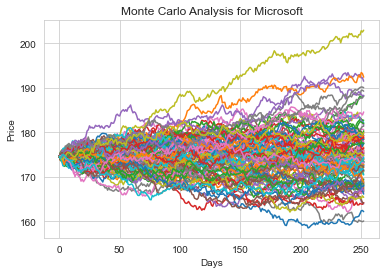

In [105]:
# Getting Apple' start price
start_price = MSFT.iloc[-1,5]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')


This is how a Monte Carlo simulation looks like. We have our starting prices and then based on the expected return and volatility of the stock, we keep adding a positive or negative shock to the price which drives up or down. Doing this returns a range of prices that we could end up having.

We can now run a larger number of simulations to get numeric values on worst case scenarios.

In [106]:

# Doing a larger run and plotting it in a histogram

# Setting the number of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Plotting the results:

Text(0.5, 1.0, 'Final price distribution for Microsoft Stock after 253 days')

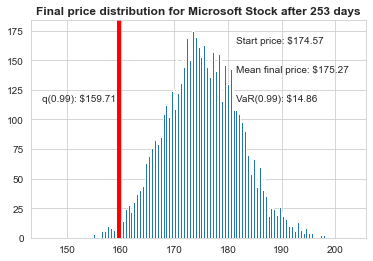

In [107]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    

plt.hist(simulations,bins=200)
# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Microsoft Stock after %s days" % days, weight='bold')